In [3]:
#*************************************************************************************
#    Importing all necessary modules to run the Proposed Technique of Visual Ethics 
#*************************************************************************************
import emoji
import re
import nltk
import pandas as pd
from six import python_2_unicode_compatible
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn import preprocessing
from nltk.corpus import wordnet

#importing modules for Topic Modeling 
from sklearn.feature_extraction.text import CountVectorizer as countVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import GridSearchCV
import numpy as np
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.lang.en import English
import gensim 


from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import pos_tag, word_tokenize

# Download NLTK resources (if not already downloaded)
#nltk.download('punkt')
#nltk.download('vader_lexicon')
#nltk.download('averaged_perceptron_tagger')

# Phase 1: 

## Step 1: Collecting User Reviews

In [44]:

#***********************************************************************
# TTAG+R Android Apps User Reviews as input of the framework 
#***********************************************************************

## We have Executed this same codes into 3 different dataset ; uncomment each dataset to test individual results

#originalSource = pd.read_csv("Reviews1_TopFreeAndroidGames.csv") #2265 User Remarks

originalSource = pd.read_csv("Reviews2_TopGrossingAndroidGames.csv") #3960 User Remarks


In [46]:
df_initialProcessing= pd.DataFrame(originalSource['Remarks']).dropna()
df_initialProcessing

,Remarks
0,This game is very fun. It's the perfect zen game before bed. Great game for kids. Doesn't save progress if you switch phone. If the program has glitches you lose progress. I had too many prizes I paid for at the vending machine and it glitched the prizes got stuck and I had to reset it lost all my m...\n
1,Love this game. All mini games are great too! Just wish we got rolls and stickers more. CHANGING TO 2 STARS. IVE BEEN CONTACTING THEM FOR 5 DAYS AND THE PEOPLE RARELY MESSAGE BACK. I haven't received a reward for a challenge/tourneyment. Gave them all info and screenshots too. I loved this game and ...\n
2,"This game is beginning to really suck. You've got more ads than ever. It takes to long to collect the cards for collections, not to mention how many you have to have. Also, the challenges don't give you enough time to complete. And it takes an extremely long time to gain energy."
3,This is my 3rd review because I keep hoping problems will be solved. first I lost my game and all my purchases when my game didn't save to my profile. Now my game lkeeps glitching and freezing. Inover lost many times to level up because of these freezes and all BK people tell we is uninstall and rei...\n
4,"Great game. Similar to Age of Empires. Not really pay to win, but you could pay to advance a little. It's not worth it though. After paying like $50 to support them, I quickly realize only the cheap offers are worth it. The expensive ones are not worth it. For example, I got 9 ""limited scrolls"" for ...\n"
...,...
3955,"Pure money scam as of late. Played for 3 years and have watched a good, free game turn into a ""BUY ME BUY ME BUY ME"" bombardment for in-app purchases, and every single update brings more benefits to spenders while reducing the ability of free players to exist, let alone have ANY chance of ""winning"" ...\n"
3956,"Not fair too expensive. Ongoingly. It gets worse every level. No yet a developer adds smirky note to the injury, events? Only the strongest or paying get anywhere! What a sham. Edited: not only sham .it takes my calculations about 3 years to reach the unbeatable 40 castle. Really good for you create...\n"
3957,Very fun and will keep you mind going all the time .. really starting to love this game
3958,"Uninstalling, pay to play? this game has turned into that jerk friend that didn't let you play with their toys. Because now the game only let's you play X number of times before they scheme to charge you or prevent you from engaging reached level 16 and level 14 castle signing out... this another ga...\n"


## Step 2: Preprocessing

In [48]:
#******************************************************************
# Step 1 : Pre-Processing User Reviews 
#******************************************************************
# Set the display option to show more characters in columns
pd.set_option('display.max_colwidth', None)

def unwantedCharacters_removing(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = re.sub(emoji.get_emoji_regexp(), r"", text)
    return text

def stopwords_removing(sentence):
    tokens = sentence.split(" ")
    text_tokens = word_tokenize(sentence)
    stop_words = set(stopwords.words('english'))
    tokens_filtered= [word for word in text_tokens if not word in stop_words]
    return (" ").join(tokens_filtered)
    
def noise_removing(text):
    blob = TextBlob(text)
    string = ' '.join([word for (word,tag) in blob.tags if tag == "NN" or tag == "NNS" or tag == "NNP" or tag == "NNPS" or tag == "JJ" or tag == "JJR" or tag == "JJS" or tag == "RB" or tag == "RBR" or tag == "RBS" or tag == "VB" or tag == "VBG" or tag == "VBD" or tag == "VBN" or tag == "VBP" or tag == "VPZ" or tag == "ADV"or tag == "VERB"])
    return string

def words_lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output


df_initialProcessing= pd.DataFrame(originalSource['Remarks']).dropna()

df_initialProcessing['UnwantedCharacters_Removed'] = df_initialProcessing['Remarks'].apply(unwantedCharacters_removing)
df_initialProcessing['Stopwords_Removed'] = df_initialProcessing['UnwantedCharacters_Removed'].apply(stopwords_removing)
df_initialProcessing['Noise_Removed'] = df_initialProcessing['Stopwords_Removed'].apply(noise_removing)
df_initialProcessing['Words_Lemmatized'] = df_initialProcessing['Noise_Removed'].apply(words_lemmatizing)
df_initialProcessing['Words_Lemmatized'] = df_initialProcessing['Words_Lemmatized'].str.lower()

df_initialProcessing.head(3)

,Remarks,UnwantedCharacters_Removed,Stopwords_Removed,Noise_Removed,Words_Lemmatized
0,This game is very fun. It's the perfect zen game before bed. Great game for kids. Doesn't save progress if you switch phone. If the program has glitches you lose progress. I had too many prizes I paid for at the vending machine and it glitched the prizes got stuck and I had to reset it lost all my m...\n,This game is very fun It s the perfect zen game before bed Great game for kids Doesn t save progress if you switch phone If the program has glitches you lose progress I had too many prizes I paid for at the vending machine and it glitched the prizes got stuck and I had to reset it lost all my m,This game fun It perfect zen game bed Great game kids Doesn save progress switch phone If program glitches lose progress I many prizes I paid vending machine glitched prizes got stuck I reset lost,game fun perfect zen game bed Great game kids Doesn save progress switch phone program glitches lose progress many prizes paid vending machine glitched prizes got stuck reset lost,game fun perfect zen game bed great game kid doesn save progress switch phone program glitch lose progress many prize paid vending machine glitched prize got stuck reset lost
1,Love this game. All mini games are great too! Just wish we got rolls and stickers more. CHANGING TO 2 STARS. IVE BEEN CONTACTING THEM FOR 5 DAYS AND THE PEOPLE RARELY MESSAGE BACK. I haven't received a reward for a challenge/tourneyment. Gave them all info and screenshots too. I loved this game and ...\n,Love this game All mini games are great too Just wish we got rolls and stickers more CHANGING TO STARS IVE BEEN CONTACTING THEM FOR DAYS AND THE PEOPLE RARELY MESSAGE BACK I haven t received a reward for a challenge tourneyment Gave them all info and screenshots too I loved this game and,Love game All mini games great Just wish got rolls stickers CHANGING TO STARS IVE BEEN CONTACTING THEM FOR DAYS AND THE PEOPLE RARELY MESSAGE BACK I received reward challenge tourneyment Gave info screenshots I loved game,Love game All games great Just wish got rolls stickers CHANGING TO STARS IVE BEEN CONTACTING THEM FOR DAYS AND THE PEOPLE RARELY MESSAGE BACK received reward challenge tourneyment Gave info screenshots loved game,love game all game great just wish got roll sticker changing to stars ive been contacting them for days and the people rarely message back received reward challenge tourneyment gave info screenshots loved game
2,"This game is beginning to really suck. You've got more ads than ever. It takes to long to collect the cards for collections, not to mention how many you have to have. Also, the challenges don't give you enough time to complete. And it takes an extremely long time to gain energy.",This game is beginning to really suck You ve got more ads than ever It takes to long to collect the cards for collections not to mention how many you have to have Also the challenges don t give you enough time to complete And it takes an extremely long time to gain energy,This game beginning really suck You got ads ever It takes long collect cards collections mention many Also challenges give enough time complete And takes extremely long time gain energy,game beginning really suck got ads ever long collect cards collections mention many Also give enough time complete extremely long time gain energy,game beginning really suck got ad ever long collect card collection mention many also give enough time complete extremely long time gain energy


# Phase 2: Creating Controls for Analysis

In [17]:
import pandas as pd

# Set the display option to show more characters in columns
pd.set_option('display.max_colwidth', None)

# Define the data
data = {
    'Dimension': ['Character Game Design', 'Environmental Game Design', 'Interaction and Storyplay Design'],
    'Features': [
        'avatars, diverse personalities, expressions, costumes, emotions, animations, backstory, unique abilities, character customization',
        'landscapes, visually striking settings, weather effects, day-night cycles, interactive elements, ambient sounds, environmental storytelling, dynamic environments, realistic physics, hidden Easter eggs',
        'Choices, impact, engaging storyplay, dialogue options, branching narratives, player agency, non-linear progression, character relationships, moral dilemmas, multiple endings'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
#print(df)
df


,Dimension,Features
0,Character Game Design,"avatars, diverse personalities, expressions, costumes, emotions, animations, backstory, unique abilities, character customization"
1,Environmental Game Design,"landscapes, visually striking settings, weather effects, day-night cycles, interactive elements, ambient sounds, environmental storytelling, dynamic environments, realistic physics, hidden Easter eggs"
2,Interaction and Storyplay Design,"Choices, impact, engaging storyplay, dialogue options, branching narratives, player agency, non-linear progression, character relationships, moral dilemmas, multiple endings"


In [49]:
#**********************************
# Apply Sentimental Analysis
#**********************************

# function to calculate subjectivity
def getSubjectivity(review): 
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
        return TextBlob(review).sentiment.polarity 

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    

#applying sentiment Analysis on Cleaned Reviews
df_sentimentAnalysis = pd.DataFrame()
df_sentimentAnalysis['Words_lemmatized'] = df_initialProcessing['Words_Lemmatized']
df_sentimentAnalysis['Subjectivity_score'] = df_initialProcessing['Words_Lemmatized'].apply(getSubjectivity)
df_sentimentAnalysis['Polarity_score'] = df_initialProcessing['Words_Lemmatized'].apply(getPolarity) 
df_sentimentAnalysis['Sentiment_analysis'] = df_sentimentAnalysis['Polarity_score'].apply(analysis)

df_sentimentAnalysis[["Words_lemmatized","Subjectivity_score","Polarity_score","Sentiment_analysis"]]

,Words_lemmatized,Subjectivity_score,Polarity_score,Sentiment_analysis
0,game fun perfect zen game bed great game kid doesn save progress switch phone program glitch lose progress many prize paid vending machine glitched prize got stuck reset lost,0.521429,0.200000,Positive
1,love game all game great just wish got roll sticker changing to stars ive been contacting them for days and the people rarely message back received reward challenge tourneyment gave info screenshots loved game,0.531250,0.137500,Positive
2,game beginning really suck got ad ever long collect card collection mention many also give enough time complete extremely long time gain energy,0.400000,0.042857,Positive
3,review keep hoping problem solved first lost game purchase game save profile now game lkeeps glitching freezing inover lost many time level freeze bk people tell uninstall rei,0.406667,-0.090000,Negative
4,great game similar age not really pay win pay advance little paying support quickly realize cheap offer expensive one example got limited scroll,0.469286,0.107440,Positive
...,...,...,...,...
3955,pure money scam late played year watched good free game turn buy me buy me buy me bombardment app purchase single update brings benefit spender reducing ability free player exist let alone any chance winning,0.583036,0.180357,Positive
3956,not fair expensive worse level no yet smirky note injury event only strongest paying get anywhere sham edited sham calculation year reach unbeatable castle really good create,0.628571,-0.135714,Negative
3957,very fun keep mind going time really starting love game,0.340000,0.122500,Positive
3958,uninstalling pay play game turned jerk friend let play toy game let play x number time scheme charge prevent engaging reached level level castle signing ga,0.500000,-0.133333,Negative


# Phase 3:

In [51]:
import re

def apply_lexical_semantic_rules(review):
    results = {}

    # Rule 1: Named Entities
    named_entities = re.findall(r'\b(?:[A-Z][a-z]*\s*)+', review)
    results['Named Entities'] = named_entities

    # Rule 2: Visual Elements Keywords
    visual_elements_keywords = re.findall(r'\b(?:appearance|looks|graphics|design)\b', review, flags=re.IGNORECASE)
    results['Visual Elements Keywords'] = visual_elements_keywords

    # Rule 3: Customization Keywords
    customization_keywords = re.findall(r'\b(?:customization|outfits|accessories|personalization)\b', review, flags=re.IGNORECASE)
    results['Customization Keywords'] = customization_keywords

    # Rule 4: Story Impact Keywords
    story_impact_keywords = re.findall(r'\b(?:story paths|narrative choices)\b', review, flags=re.IGNORECASE)
    results['Story Impact Keywords'] = story_impact_keywords

    # Rule 5: Role-Playing Elements Keywords
    role_playing_keywords = re.findall(r'\b(?:role-playing|avatars|character development)\b', review, flags=re.IGNORECASE)
    results['Role-Playing Elements Keywords'] = role_playing_keywords

    # Rule 6: Sentiment Keywords
    sentiment_keywords = re.findall(r'\b(?:love|enjoy|hate|disappoint)\b', review, flags=re.IGNORECASE)
    results['Sentiment Keywords'] = sentiment_keywords

    # Rule 7: User Interaction Keywords
    user_interaction_keywords = re.findall(r'\b(?:user interaction|emotional engagement|player interaction)\b', review, flags=re.IGNORECASE)
    results['User Interaction Keywords'] = user_interaction_keywords

    # Rule 8: Comparison Keywords
    comparison_keywords = re.findall(r'\b(?:comparisons)\b', review, flags=re.IGNORECASE)
    results['Comparison Keywords'] = comparison_keywords

    # Rule 9: Adjectives Describing Characters
    adjectives_characters = re.findall(r'\b(?:heroic|villainous|mysterious|unique)\b', review, flags=re.IGNORECASE)
    results['Adjectives Describing Characters'] = adjectives_characters

    # Rule 10: Visual Styles Keywords
    visual_styles_keywords = re.findall(r'\b(?:stunning|top-notch|realistic|stylized|fantasy)\b', review, flags=re.IGNORECASE)
    results['Visual Styles Keywords'] = visual_styles_keywords

    # Rule 11: Morality Keywords
    morality_keywords = re.findall(r'\b(?:ethical|moral|virtuous|righteous)\b', review, flags=re.IGNORECASE)
    results['Morality Keywords'] = morality_keywords

    # Rule 12: Consequences Keywords
    consequences_keywords = re.findall(r'\b(?:consequences|impact|repercussions|due to that)\b', review, flags=re.IGNORECASE)
    results['Consequences Keywords'] = consequences_keywords

    # Rule 13: Alignment Keywords
    alignment_keywords = re.findall(r'\b(?:good|evil|neutral)\b', review, flags=re.IGNORECASE)
    results['Alignment Keywords'] = alignment_keywords

    # Rule 14: Moral Judgments
    moral_judgments = re.findall(r'\b(?:right|wrong|justified|unjustified)\b', review, flags=re.IGNORECASE)
    results['Moral Judgments'] = moral_judgments

    # Rule 15: User Values
    user_values_keywords = re.findall(r'\b(?:aligns with my values|conflicts with my values|against personal belief|against ethnicity|r*acism|exploitation)\b', review, flags=re.IGNORECASE)
    results['User Values'] = user_values_keywords

    return results

# Example Review
example_review = """
    I played this game and absolutely loved the character customization. The named entities like 'Phoenix' and 'Luna' have unique appearances that stand out.
    The visual elements are stunning, and the graphics are top-notch. The story impact of character design is evident as it influences different story paths and narrative choices.
    The role-playing elements and avatars allow for a personalized gaming experience. I appreciate the morality aspect of the game, presenting ethical dilemmas and consequences for character actions.
    The alignment of characters with different values adds depth to the ethical narrative. Personally, I value games that align with my moral beliefs, and this one does it perfectly.
    The villains' actions felt unjustified, and the game made me question their morality. Overall, a fantastic game!
"""

# Apply Lexical Semantic Rules
results = apply_lexical_semantic_rules(example_review)

# Display Results
for rule, keywords in results.items():
    print(f"{rule}: {keywords}")



Named Entities: ['I ', 'The ', 'Phoenix', 'Luna', 'The ', 'The ', 'The ', 'I ', 'The ', 'Personally', 'I ', 'The ', 'Overall']
Visual Elements Keywords: ['graphics', 'design']
Customization Keywords: ['customization']
Story Impact Keywords: ['story paths', 'narrative choices']
Role-Playing Elements Keywords: ['role-playing', 'avatars']
Sentiment Keywords: []
User Interaction Keywords: []
Comparison Keywords: []
Adjectives Describing Characters: ['unique']
Visual Styles Keywords: ['stunning', 'top-notch']
Morality Keywords: ['ethical', 'ethical', 'moral']
Consequences Keywords: ['impact', 'consequences']
Alignment Keywords: []
Moral Judgments: ['unjustified']
User Values: []


# Phase 4:

In [58]:
# Assuming df_initialProcessing is your dataset
# Replace 'your_column_name' with the actual column name containing reviews
reviews_column = 'Words_Lemmatized' # Replace 'your_dataset.csv' with the actual dataset file

# Function to get sentiment score
def get_sentiment_score(review):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(review)['compound']
    return 'Positive' if sentiment_score >= 0 else 'Negative'

# Function to get subject, intent, verbs, and adjectives
def extract_review_info(review):
    tokens = word_tokenize(review)
    tagged_words = pos_tag(tokens)

    subject = None
    review = review
    verbs = []
    adjectives = []

    for word, pos in tagged_words:
        if pos.startswith('NN'):  # Noun
            subject = word
        elif pos.startswith('VB'):  # Verb
            verbs.append(word)
        elif pos.startswith('JJ'):  # Adjective
            adjectives.append(word)

    return subject, review, verbs, adjectives

# Analyze each review in the dataset
results = []
for review in df_initialProcessing[reviews_column]:
    sentiment = get_sentiment_score(review)
    subject, review, verbs, adjectives = extract_review_info(review)
    results.append({
        'Review': review,
        'Sentiment': sentiment,
        'Subject': subject,
        'Verbs': verbs,
        'Adjectives': adjectives
    })

# Create a new DataFrame with the results
df_review_info = pd.DataFrame(results)

# Display the DataFrame
df_review_info # You can adjust the number of rows displayed as needed


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Review,Sentiment,Subject,Verbs,Adjectives
0,game fun perfect zen game bed great game kid doesn save progress switch phone program glitch lose progress many prize paid vending machine glitched prize got stuck reset lost,Positive,reset,"[perfect, bed, switch, lose, paid, vending, glitched, got, lost]","[zen, great, many, stuck]"
1,love game all game great just wish got roll sticker changing to stars ive been contacting them for days and the people rarely message back received reward challenge tourneyment gave info screenshots loved game,Positive,game,"[love, got, changing, been, contacting, message, received, gave, loved]","[great, wish, roll, ive, info]"
2,game beginning really suck got ad ever long collect card collection mention many also give enough time complete extremely long time gain energy,Positive,energy,"[beginning, got, give]","[suck, collect, many, enough, complete, long]"
3,review keep hoping problem solved first lost game purchase game save profile now game lkeeps glitching freezing inover lost many time level freeze bk people tell uninstall rei,Positive,rei,"[keep, hoping, solved, lost, save, glitching, freezing, lost, tell]","[many, bk, uninstall]"
4,great game similar age not really pay win pay advance little paying support quickly realize cheap offer expensive one example got limited scroll,Positive,scroll,"[pay, paying, realize, got]","[great, similar, win, little, cheap, expensive, limited]"
...,...,...,...,...,...
3955,pure money scam late played year watched good free game turn buy me buy me buy me bombardment app purchase single update brings benefit spender reducing ability free player exist let alone any chance winning,Positive,winning,"[played, watched, buy, buy, buy, reducing, exist, let]","[good, free, bombardment, app, single, update, free]"
3956,not fair expensive worse level no yet smirky note injury event only strongest paying get anywhere sham edited sham calculation year reach unbeatable castle really good create,Positive,create,"[paying, edited, reach]","[fair, expensive, worse, smirky, strongest, unbeatable, good]"
3957,very fun keep mind going time really starting love game,Positive,game,"[keep, going, starting]",[fun]
3958,uninstalling pay play game turned jerk friend let play toy game let play x number time scheme charge prevent engaging reached level level castle signing ga,Positive,ga,"[turned, let, play, let, play, x, engaging, reached]","[uninstalling, jerk, toy, scheme]"


# Phase 5

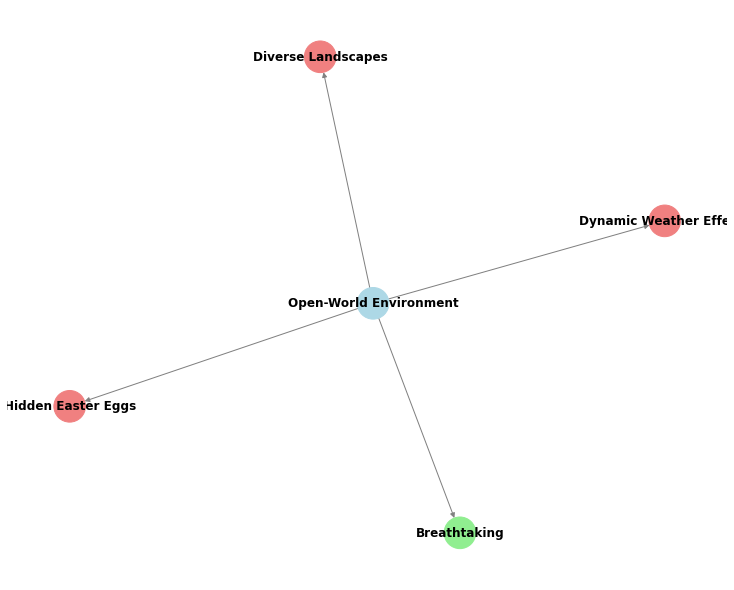

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

# Example User Review
review = "The open-world environment in this game is breathtaking. Exploring the diverse landscapes, encountering dynamic weather effects, and uncovering hidden Easter eggs make the gameplay truly immersive."

# Function to create a graph from a review
def create_review_graph(review):
    # Split the review into subject and intent (simplified representation)
    subject = "Open-World Environment"
    intent = "Breathtaking"

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes for subject and intent
    G.add_node(subject, color="lightblue", node_type="subject")
    G.add_node(intent, color="lightgreen", node_type="intent")

    # Add an edge between subject and intent
    G.add_edge(subject, intent, color="gray", edge_type="subject_intent")

    # Additional nodes and edges for complex review
    features = ["Diverse Landscapes", "Dynamic Weather Effects", "Hidden Easter Eggs"]
    for feature in features:
        G.add_node(feature, color="lightcoral", node_type="feature")
        G.add_edge(subject, feature, color="gray", edge_type="subject_feature")

    return G

# Create a graph from the example review
review_graph = create_review_graph(review)

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(review_graph)
node_colors = [review_graph.nodes[node]["color"] for node in review_graph.nodes]
edge_colors = [review_graph.edges[edge]["color"] for edge in review_graph.edges]
nx.draw(review_graph, pos, with_labels=True, font_weight="bold", node_size=1000, node_color=node_colors, font_size=12, font_color="black", edge_color=edge_colors, arrowsize=10)
plt.show()


In [72]:
import numpy as np
import pandas as pd

# Set of morality keywords
morality_keywords = ['ethical', 'moral', 'virtuous', 'righteous', 'unjustified', 'good', 'evil', 'neutral', 'consequences']

# Number of topics and terms
num_topics = 5
num_terms_per_topic = 10

# Generate a random LDA matrix
np.random.seed(42)  # Set seed for reproducibility
lda_matrix = np.random.rand(num_topics, len(morality_keywords))

# Normalize the matrix to represent probabilities
lda_matrix /= lda_matrix.sum(axis=1)[:, np.newaxis]

# Create a DataFrame to display the results
lda_df = pd.DataFrame(lda_matrix, columns=morality_keywords, index=[f"Topic {i+1}" for i in range(num_topics)])

# Display the LDA matrix
print("LDA Matrix:")
print(lda_df)


LDA Matrix:
          ethical     moral  virtuous  righteous  unjustified      good  \
Topic 1  0.083355  0.211585  0.162908   0.133234     0.034723  0.034717   
Topic 2  0.179824  0.005228  0.246322   0.211410     0.053926  0.046177   
Topic 3  0.120859  0.081487  0.171198   0.039031     0.081743  0.102509   
Topic 4  0.108968  0.125535  0.009843   0.128741     0.036135  0.013785   
Topic 5  0.091028  0.029187  0.204470   0.131531     0.036469  0.147974   

             evil   neutral  consequences  
Topic 1  0.012927  0.192771      0.133780  
Topic 2  0.046578  0.077266      0.133269  
Topic 3  0.127610  0.219694      0.055869  
Topic 4  0.201072  0.204621      0.171302  
Topic 5  0.010276  0.271733      0.077331  


# Phase 6

In [74]:
import numpy as np
import pandas as pd
from gensim import corpora, models
from sklearn.feature_extraction.text import CountVectorizer

# Set a seed for reproducibility
np.random.seed(42)

# Generate random reviews
np.random.seed(42)
random_reviews = [
    "The game promotes unethical behavior with its character choices.",
    "I appreciate the moral dilemmas presented in the game.",
    "The characters in the game lack moral depth and development.",
    "The storyline raises important ethical questions.",
    "The consequences of character actions are not well thought out.",
    "This game aligns with my values and promotes virtuous choices.",
    "The visual elements in the game contribute to its ethical narrative.",
    "The morality alignment of characters is inconsistent.",
    "The game presents unjustified actions by the villains.",
    "The game needs to consider the ethical impact of its choices on players."
]

# Preprocess the reviews
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(random_reviews)

# Create a gensim dictionary
dictionary = corpora.Dictionary([vectorizer.get_feature_names_out()])

# Create a gensim corpus
corpus = [dictionary.doc2bow(review.split()) for review in random_reviews]

# Apply LDA model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15, random_state=42)

# Display the topics and associated terms
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(f"Topic {topic[0] + 1}: {topic[1]}")


Topic 1: 0.026*"game" + 0.026*"character" + 0.026*"actions" + 0.026*"ethical" + 0.026*"characters"
Topic 2: 0.159*"characters" + 0.159*"alignment" + 0.159*"morality" + 0.014*"game" + 0.014*"actions"
Topic 3: 0.139*"moral" + 0.139*"presented" + 0.139*"dilemmas" + 0.139*"appreciate" + 0.013*"game"
Topic 4: 0.026*"game" + 0.026*"character" + 0.026*"actions" + 0.026*"morality" + 0.026*"ethical"
Topic 5: 0.026*"game" + 0.026*"actions" + 0.026*"ethical" + 0.026*"characters" + 0.026*"moral"
Topic 6: 0.026*"game" + 0.026*"ethical" + 0.026*"characters" + 0.026*"moral" + 0.026*"actions"
Topic 7: 0.139*"ethical" + 0.139*"important" + 0.139*"raises" + 0.139*"storyline" + 0.013*"game"
Topic 8: 0.141*"game" + 0.074*"ethical" + 0.074*"impact" + 0.074*"choices" + 0.074*"needs"
Topic 9: 0.139*"actions" + 0.139*"character" + 0.139*"thought" + 0.139*"consequences" + 0.013*"game"
Topic 10: 0.179*"game" + 0.092*"promotes" + 0.048*"visual" + 0.048*"contribute" + 0.048*"unethical"
